##  Project Assignment - Specialist Certificate in Data Analytics Essentials- Robbie Pratt 


#### 1.1. Import Python Packages

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

#### 1.2. Import a CSV file into a Pandas DataFrame

In [2]:
df_BestBooks=pd.read_csv('BestBooks.csv')
df_BestBooks.head(3)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN


#### 1.3.  Web Scraping - Is in the complimentary notebook

#### 1.4. View Data

In [3]:
print(df_BestBooks.shape)

(52478, 25)


#### 1.5. Find missing values in the dataset

In [4]:
null = df_BestBooks.isna().sum()
print("Number of null values in the dataset are null: ", null)

Number of null values in the dataset are null:  bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64


Columns that were not needed and had a lot of missing values, were dropped.

In [5]:
df_BestBooks = df_BestBooks.drop(columns = ['series', 'description', 'language', 'bookFormat', 'edition', 'pages', 'publisher', 'publishDate', 'firstPublishDate', 'coverImg'])

In [6]:
null = df_BestBooks.isnull().sum()
print("Number of null values in the dataset are null: ", null)

Number of null values in the dataset are null:  bookId                0
title                 0
author                0
rating                0
isbn                  0
genres                0
characters            0
awards                0
numRatings            0
ratingsByStars        0
likedPercent        622
setting               0
bbeScore              0
bbeVotes              0
price             14365
dtype: int64


In [7]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...","['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",2269402,23328,NaN


Drop rows with missing price as I will be doing linear regression comparing price and reviews.

In [8]:
df_BestBooks.dropna(axis=0, inplace=True)

In [9]:
null = df_BestBooks.isna().sum()
print("Number of null values in the dataset are null: ", null)

Number of null values in the dataset are null:  bookId            0
title             0
author            0
rating            0
isbn              0
genres            0
characters        0
awards            0
numRatings        0
ratingsByStars    0
likedPercent      0
setting           0
bbeScore          0
bbeVotes          0
price             0
dtype: int64


In [10]:
print(df_BestBooks.shape)

(37901, 15)


In [11]:
null = df_BestBooks.isna().sum()
print("Number of null values in the dataset are null: ", null)

Number of null values in the dataset are null:  bookId            0
title             0
author            0
rating            0
isbn              0
genres            0
characters        0
awards            0
numRatings        0
ratingsByStars    0
likedPercent      0
setting           0
bbeScore          0
bbeVotes          0
price             0
dtype: int64


In [12]:
df_BestBooks.dropna(axis=0, inplace=True)

In [13]:
null = df_BestBooks.isna().sum()
print("Number of null values in the dataset are null: ", null)

Number of null values in the dataset are null:  bookId            0
title             0
author            0
rating            0
isbn              0
genres            0
characters        0
awards            0
numRatings        0
ratingsByStars    0
likedPercent      0
setting           0
bbeScore          0
bbeVotes          0
price             0
dtype: int64


In [14]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1


### Awards is in a list, convert to string and count awards

df_BestBooks ['awards'] = df_BestBooks['awards'].str.replace(r'\W',"")

In [15]:
df_BestBooks.head(10)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1
5,19063.The_Book_Thief,The Book Thief,Markus Zusak (Goodreads Author),4.37,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",1372809,14168,3.8
6,170448.Animal_Farm,Animal Farm,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...","['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,"['England', 'United Kingdom']",1276599,13264,4.42
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.60,9780345538376,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",[],110146,"['78217', '22857', '6628', '1477', '967']",98.0,['Middle-earth'],1159802,12111,21.15
9,18405.Gone_with_the_Wind,Gone with the Wind,Margaret Mitchell,4.30,9780446675536,"['Classics', 'Historical Fiction', 'Fiction', ...","[""Scarlett O'Hara"", 'Rhett Butler', 'Ashley Wi...","['Pulitzer Prize for Novel (1937)', 'National ...",1074620,"['602138', '275517', '133535', '39008', '24422']",94.0,"['Atlanta, Georgia (United States)']",1087732,11211,5.58
12,370493.The_Giving_Tree,The Giving Tree,Shel Silverstein,4.37,9780060256654,"['Childrens', 'Picture Books', 'Classics', 'Fi...",[],[],905731,"['556142', '204347', '94819', '27950', '22473']",94.0,[],1021534,10594,4.87
13,6185.Wuthering_Heights,Wuthering Heights,"Emily Brontë, Richard J. Dunn (Editor), David ...",3.86,9780393978896,"['Classics', 'Fiction', 'Romance', 'Gothic', '...","['Heathcliff', 'Catherine Earnshaw', 'Edgar Li...",[],1342664,"['483222', '413051', '279702', '107437', '59252']",88.0,"['Yorkshire Dales, England']",981502,10275,2.73
15,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,Arthur Golden,4.12,9781400096893,"['Fiction', 'Historical Fiction', 'Romance', '...","['Sayuri Nitta', 'Mr. Bekku', 'Ichiro Tanaka',...",[],1717312,"['712950', '615702', '295184', '66518', '26958']",95.0,"['Kyoto (Japan)', 'Japan']",862748,8993,2.76


Numpy count awards

In [16]:
df_BestBooks['awards']

0        ['Locus Award Nominee for Best Young Adult Boo...
1        ['Bram Stoker Award for Works for Young Reader...
4        ['Georgia Peach Book Award (2007)', 'Buxtehude...
5        ['National Jewish Book Award for Children’s an...
6        ['Prometheus Hall of Fame Award (2011)', 'Retr...
                               ...                        
52470    ['HOLT Medallion by Virginia Romance Writers N...
52472                                                   []
52475              ["Readers' Favorite Book Award (2011)"]
52476                                                   []
52477                                                   []
Name: awards, Length: 37901, dtype: object

In [17]:
df_BestBooks['Award_Count'] = df_BestBooks['awards'].apply(lambda n: len(n.split(',')))

In [18]:
df_BestBooks['Award_Count']

0        41
1         9
4        25
5        20
6         2
         ..
52470     1
52472     1
52475     1
52476     1
52477     1
Name: Award_Count, Length: 37901, dtype: int64

In [19]:
df_BestBooks.head()

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,41
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,9
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,25
5,19063.The_Book_Thief,The Book Thief,Markus Zusak (Goodreads Author),4.37,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",1372809,14168,3.8,20
6,170448.Animal_Farm,Animal Farm,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...","['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,"['England', 'United Kingdom']",1276599,13264,4.42,2


### Split Genre list of strings so that each move is represented by the first and main genre

In [20]:
split_genre = df_BestBooks['genres'].str.split(',',n=1,expand=True)
split_genre.rename(columns={0:'new_genre',1:'restof_genre'})

,new_genre,restof_genre
0,['Young Adult',"'Fiction', 'Dystopia', 'Fantasy', 'Science Fi..."
1,['Fantasy',"'Young Adult', 'Fiction', 'Magic', 'Childrens..."
4,['Young Adult',"'Fantasy', 'Romance', 'Vampires', 'Fiction', ..."
5,['Historical Fiction',"'Fiction', 'Young Adult', 'Historical', 'Clas..."
6,['Classics',"'Fiction', 'Dystopia', 'Fantasy', 'Literature..."
...,...,...
52470,['Christian Fiction',"'Christian', 'Suspense', 'Romance', 'Mystery'..."
52472,['Romance',"'Young Adult', 'Contemporary', 'Contemporary ..."
52475,['Fantasy',"'Young Adult', 'Paranormal', 'Angels', 'Roman..."
52476,['Fiction',"'Mystery', 'Historical Fiction', 'Adventure',..."


In [21]:
df_BestBooks[['new_genre','restof_genre']]= df_BestBooks['genres'].str.split(',',n=1,expand=True)

In [23]:
df_BestBooks

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count,new_genre,restof_genre
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,41,['Young Adult',"'Fiction', 'Dystopia', 'Fantasy', 'Science Fi..."
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,9,['Fantasy',"'Young Adult', 'Fiction', 'Magic', 'Childrens..."
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,25,['Young Adult',"'Fantasy', 'Romance', 'Vampires', 'Fiction', ..."
5,19063.The_Book_Thief,The Book Thief,Markus Zusak (Goodreads Author),4.37,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",1372809,14168,3.8,20,['Historical Fiction',"'Fiction', 'Young Adult', 'Historical', 'Clas..."
6,170448.Animal_Farm,Animal Farm,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...","['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,"['England', 'United Kingdom']",1276599,13264,4.42,2,['Classics',"'Fiction', 'Dystopia', 'Fantasy', 'Literature..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52470,11115191-attracted-to-fire,Attracted to Fire,DiAnn Mills (Goodreads Author),4.14,9781414348643,"['Christian Fiction', 'Christian', 'Suspense',...",[],['HOLT Medallion by Virginia Romance Writers N...,2143,"['945', '716', '365', '78', '39']",95.0,['West Texas (United States)'],0,1,5.55,1,['Christian Fiction',"'Christian', 'Suspense', 'Romance', 'Mystery'..."
52472,12395883-unbelievable,Unbelievable,Sherry Gammon (Goodreads Author),4.16,9781477594247,"['Romance', 'Young Adult', 'Contemporary', 'Co...",[],[],1028,"['442', '384', '142', '48', '12']",94.0,"['Port Fare, New York (United States)']",0,1,19.18,1,['Romance',"'Young Adult', 'Contemporary', 'Contemporary ..."
52475,10815662-marked,Marked,Kim Richardson (Goodreads Author),3.70,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],0,1,7.37,1,['Fantasy',"'Young Adult', 'Paranormal', 'Angels', 'Roman..."
52476,11330278-wayward-son,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,9781450755634,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],[],238,"['77', '78', '59', '19', '5']",90.0,[],0,1,2.86,1,['Fiction',"'Mystery', 'Historical Fiction', 'Adventure',..."


Remove special characters

In [22]:
df_BestBooks ['new_genre'] = df_BestBooks['new_genre'].str.replace(r'\W',"")

C:\Users\robbi\AppData\Local\Temp\ipykernel_9152\3804853204.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_BestBooks ['new_genre'] = df_BestBooks['new_genre'].str.replace(r'\W',"")


In [23]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count,new_genre,restof_genre
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,41,YoungAdult,"'Fiction', 'Dystopia', 'Fantasy', 'Science Fi..."
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,9,Fantasy,"'Young Adult', 'Fiction', 'Magic', 'Childrens..."
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,25,YoungAdult,"'Fantasy', 'Romance', 'Vampires', 'Fiction', ..."


In [24]:
df_BestBooks = df_BestBooks.drop(columns = ['restof_genre'])

In [25]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count,new_genre
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,41,YoungAdult
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,9,Fantasy
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,25,YoungAdult


Numpy 

In [ ]:
Reusable code - where limit to data, likability, rating...

In [87]:
df_BestBooks.loc[df_BestBooks["rating"]<= 5, "Error_rating"] = "No_Error"
df_BestBooks.loc[df_BestBooks["rating"]> 5, "Error_rating"] = "Error"
df_BestBooks.loc[df_BestBooks["rating"]< 0, "Error_rating"] = "Error"
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count,new_genre,Error_rating,Error_percentage
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,41,YoungAdult,No_Error,No_Error
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,9,Fantasy,No_Error,No_Error
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.10,25,YoungAdult,No_Error,No_Error


In [94]:
# check 'Error' exist in dataframe or not
if 'Error' in df_BestBooks.Error_rating :
    print("\nThis value exists in the Dataframe")
 
else :
    print("\nThis value does not exist in the Dataframe")

# count values in Error_rating column
print(df_BestBooks['Error_rating'].value_counts()['No_Error'])




This value does not exist in the Dataframe
37901


Reuse code for likeable

In [95]:
df_BestBooks.loc[df_BestBooks["likedPercent"]<= 100, "Error_rating"] = "No_Error"
df_BestBooks.loc[df_BestBooks["likedPercent"]> 100, "Error_rating"] = "Error"
df_BestBooks.loc[df_BestBooks["likedPercent"]< 0, "Error_rating"] = "Error"

# check 'Error' exist in dataframe or not
if 'Error' in df_BestBooks.Error_percentage :
    print("\nThis value exists in the Dataframe")
 
else :
    print("\nThis value does not exist in the Dataframe")

# count values in Error_rating column
print(df_BestBooks['Error_percentage'].value_counts()['No_Error'])


This value does not exist in the Dataframe
37901


Numpy

In [36]:
df_BestBooks.head(3)

,bookId,title,author,rating,isbn,genres,characters,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Award_Count,new_genre,Error_rating,Error_percentage
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09,41,YoungAdult,No_Error,No_Error
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38,9,Fantasy,No_Error,No_Error
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1,25,YoungAdult,No_Error,No_Error


Numpy - add maths calculation to something to show you can use this 

https://www.kaggle.com/code/lavanyashukla01/pandas-numpy-python-cheatsheet#Numpy

In [101]:
np.mean(df_BestBooks.likedPercent,axis=0)

92.29975462388855

In [102]:
np.min(df_BestBooks.likedPercent,axis=0)

0.0

In [103]:
np.max(df_BestBooks.likedPercent,axis=0)

100.0

Look at relationship between different variables using Seaborn

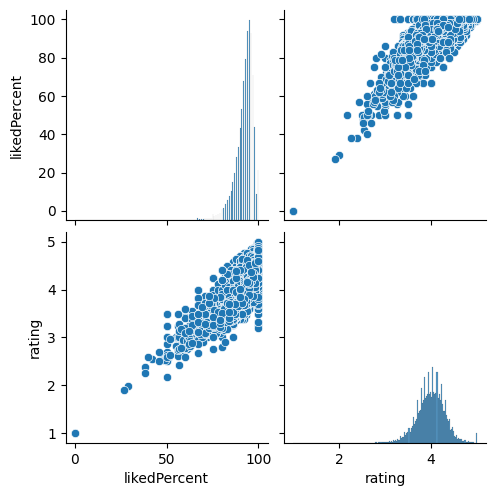

In [37]:
Z = sns.pairplot(df_BestBooks, vars=["likedPercent", "rating"])

Data types

In [38]:
print(df_BestBooks.likedPercent.dtypes)   
print(df_BestBooks.rating.dtypes)  

float64
float64


Convert price to int - previous..

In [39]:
df_BestBooks['price'] = pd.to_numeric(df_BestBooks['price'], errors='coerce')
print(df_BestBooks.price.dtypes)  

float64


Define x and y

In [40]:
X = df_BestBooks['likedPercent'].values
y = df_BestBooks['rating'].values

In [41]:
X


array([96., 98., 78., ..., 84., 90., 90.])

Need to reshape 

In [42]:
X = X.reshape(-1,1)
y = y.reshape (-1,1)

In [43]:
X

array([[96.],
       [98.],
       [78.],
       ...,
       [84.],
       [90.],
       [90.]])

In [44]:
y

array([[4.33],
       [4.5 ],
       [3.6 ],
       ...,
       [3.7 ],
       [3.85],
       [4.02]])

Split the dataset into training data and testing data - 70/30

In [45]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [46]:
X_train,X_test,y_train,y_test

(array([[96.],
        [93.],
        [95.],
        ...,
        [95.],
        [98.],
        [93.]]),
 array([[90.],
        [84.],
        [98.],
        ...,
        [91.],
        [95.],
        [95.]]),
 array([[4.13],
        [3.95],
        [4.2 ],
        ...,
        [4.  ],
        [4.54],
        [3.88]]),
 array([[3.74],
        [3.57],
        [4.48],
        ...,
        [3.86],
        [4.35],
        [4.22]]))

Make a function for regression as reg and fit the model with our split dataset

In [47]:
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

Test (predict) the output for the test data using the fitted model

In [48]:
y_predict=reg.predict(X_test)
print(y_predict)
print(y_test)

[[3.89247807]
 [3.61681745]
 [4.26002557]
 ...
 [3.93842151]
 [4.12219526]
 [4.12219526]]
[[3.74]
 [3.57]
 [4.48]
 ...
 [3.86]
 [4.35]
 [4.22]]


Determine the performance of the model using coefficent of determination

In [49]:
print('Coefficent of determination: %.3f' % r2_score(y_test,y_predict))

Coefficent of determination: 0.681


Hyperparameter tuning

In [50]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [51]:
X_train,X_test,y_train,y_test

(array([[96.],
        [93.],
        [95.],
        ...,
        [95.],
        [98.],
        [93.]]),
 array([[90.],
        [84.],
        [98.],
        ...,
        [91.],
        [95.],
        [95.]]),
 array([[4.13],
        [3.95],
        [4.2 ],
        ...,
        [4.  ],
        [4.54],
        [3.88]]),
 array([[3.74],
        [3.57],
        [4.48],
        ...,
        [3.86],
        [4.35],
        [4.22]]))

In [52]:
reg2= LinearRegression()
reg2.fit(X_train,y_train)

LinearRegression()

In [53]:
y_predict=reg2.predict(X_test)
print(y_predict)
print(y_test)

[[3.89247807]
 [3.61681745]
 [4.26002557]
 ...
 [3.93842151]
 [4.12219526]
 [4.12219526]]
[[3.74]
 [3.57]
 [4.48]
 ...
 [3.86]
 [4.35]
 [4.22]]


In [54]:
print('Coefficent of determination: %.3f' % r2_score(y_test,y_predict))

Coefficent of determination: 0.681


Visualisation - Graph (MatPlotLib)

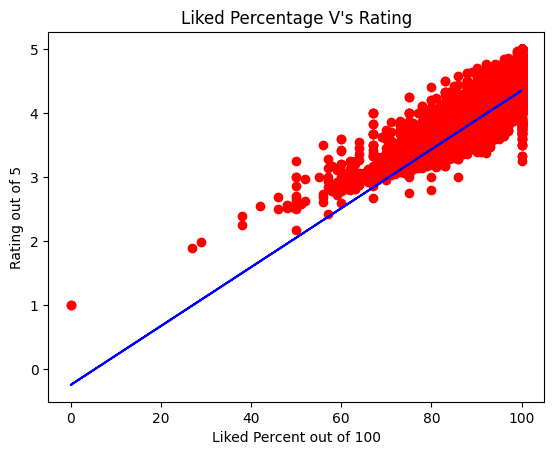

In [55]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("Liked Percentage V's Rating")
plt.xlabel("Liked Percent out of 100")
plt.ylabel("Rating out of 5")
plt.show()

predict for test

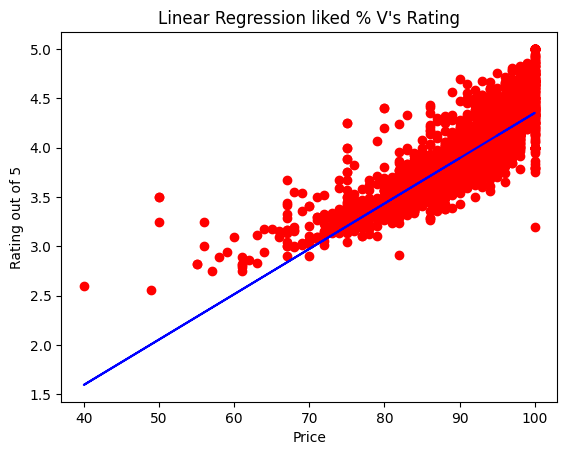

In [56]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,reg.predict(X_test),color='blue')
plt.title("Linear Regression liked % V's Rating")
plt.xlabel("Price")
plt.ylabel("Rating out of 5")
plt.show()

https://www.kaggle.com/datasets/shashwatwork/best-book-ever-data-for-2021
    

A book’s total score is based on multiple factors, including the number of people who have voted for it and how highly those voters ranked the book.

https://www.youtube.com/watch?v=Ge0z9_sywho

https://www.youtube.com/results?search_query=machine+learning+data+science+linear+regression+jupyter+notebook

https://github.com/scostap/goodreads_bbe_dataset